# Coronavirus Disease (COVID-19)

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join(path, 'datasets', 'owid-covid-data.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.shape

(191605, 67)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191605 entries, 0 to 191604
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    191605 non-null  object 
 1   continent                                   180466 non-null  object 
 2   location                                    191605 non-null  object 
 3   date                                        191605 non-null  object 
 4   total_cases                                 184063 non-null  float64
 5   new_cases                                   183796 non-null  float64
 6   new_cases_smoothed                          182622 non-null  float64
 7   total_deaths                                165591 non-null  float64
 8   new_deaths                                  165565 non-null  float64
 9   new_deaths_smoothed                         164402 non-null  float64
 

In [7]:
pd.value_counts(df.dtypes)

float64    62
object      5
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])                   # convert date to pandas datetime
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 191605 entries, 0 to 191604
Series name: date
Non-Null Count   Dtype         
--------------   -----         
191605 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [9]:
df['day_name'] = df['date'].dt.day_name()               # add name of the day
df['day'] = df['date'].dt.day                           # day
df['month'] = df['date'].dt.month                       # add month
df['year'] =  df['date'].dt.year                        # year

df[['year', 'month', 'day', 'day_name']]

,year,month,day,day_name
0,2020,2,24,Monday
1,2020,2,25,Tuesday
2,2020,2,26,Wednesday
3,2020,2,27,Thursday
4,2020,2,28,Friday
...,...,...,...,...
191600,2022,5,31,Tuesday
191601,2022,6,1,Wednesday
191602,2022,6,2,Thursday
191603,2022,6,3,Friday


# Missing Data Exploration

In [10]:
df.isna().sum()                                         # over 50 % missing data in some columns

iso_code                                        0
continent                                   11139
location                                        0
date                                            0
total_cases                                  7542
                                            ...  
excess_mortality_cumulative_per_million    185052
day_name                                        0
day                                             0
month                                           0
year                                            0
Length: 71, dtype: int64

<AxesSubplot:>

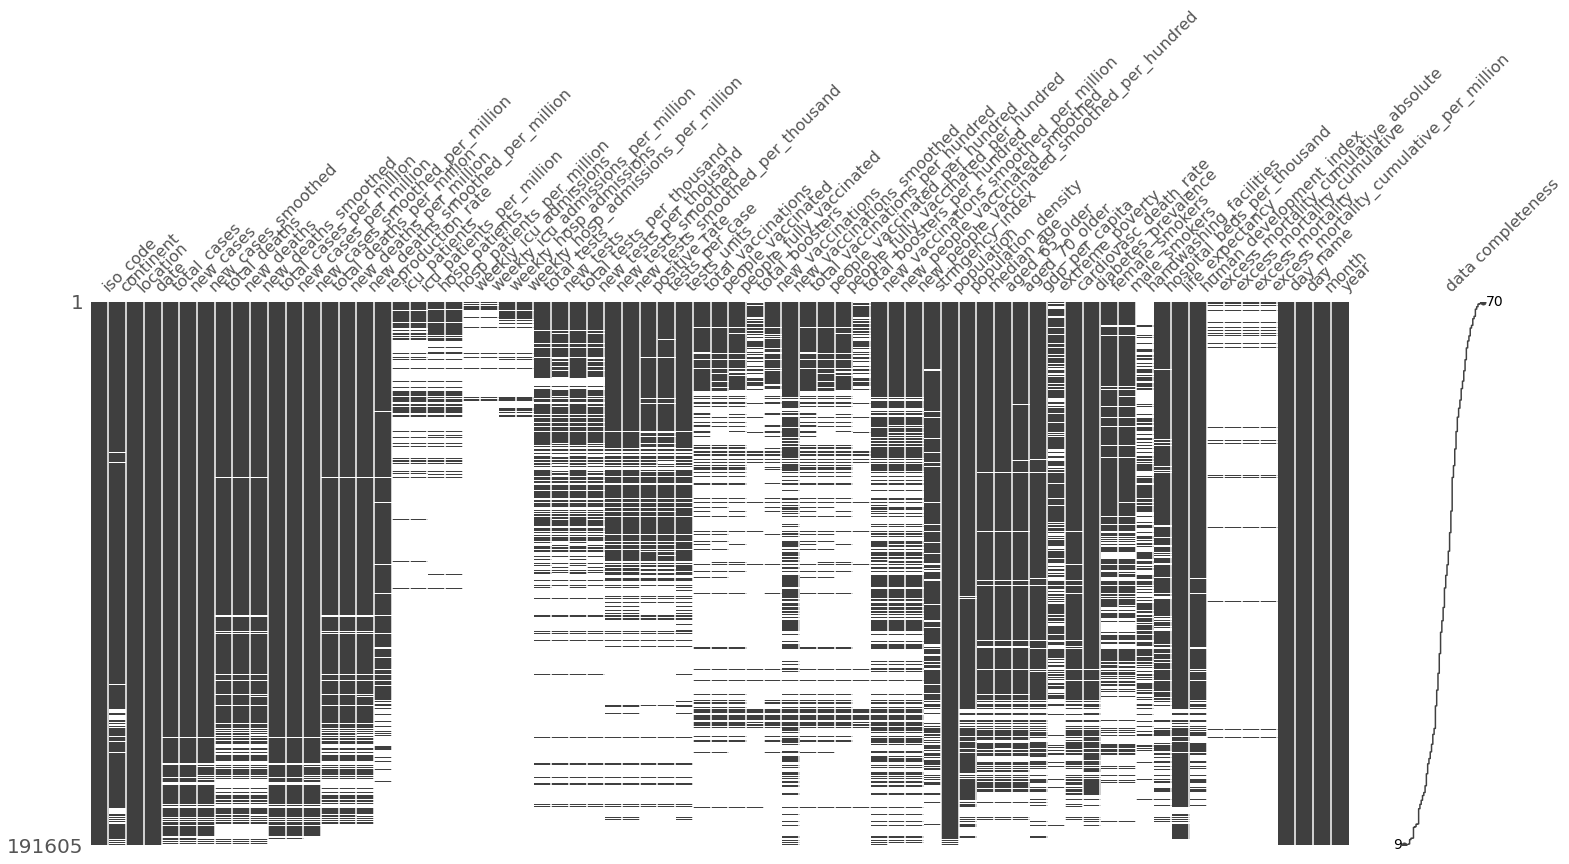

In [11]:
msno.matrix(df, labels=True, sort='descending')

Strategies for handling missing values: Using ffill()-forwardfill: according to the next observed value  OR bfill()-backfill: according to the last observed value 

In [12]:
df.bfill().isna().sum()                                 # 6126 rows still missing with the backward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    6997
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [13]:
df.ffill().isna().sum()                                  # 1487 rows missing with the forward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    1679
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [14]:
df_filled = df.ffill()                                   # adopt the forward fill strategy
df_filled.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day_name,day,month,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Monday,24,2,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Tuesday,25,2,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Wednesday,26,2,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Thursday,27,2,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Friday,28,2,2020


<AxesSubplot:>

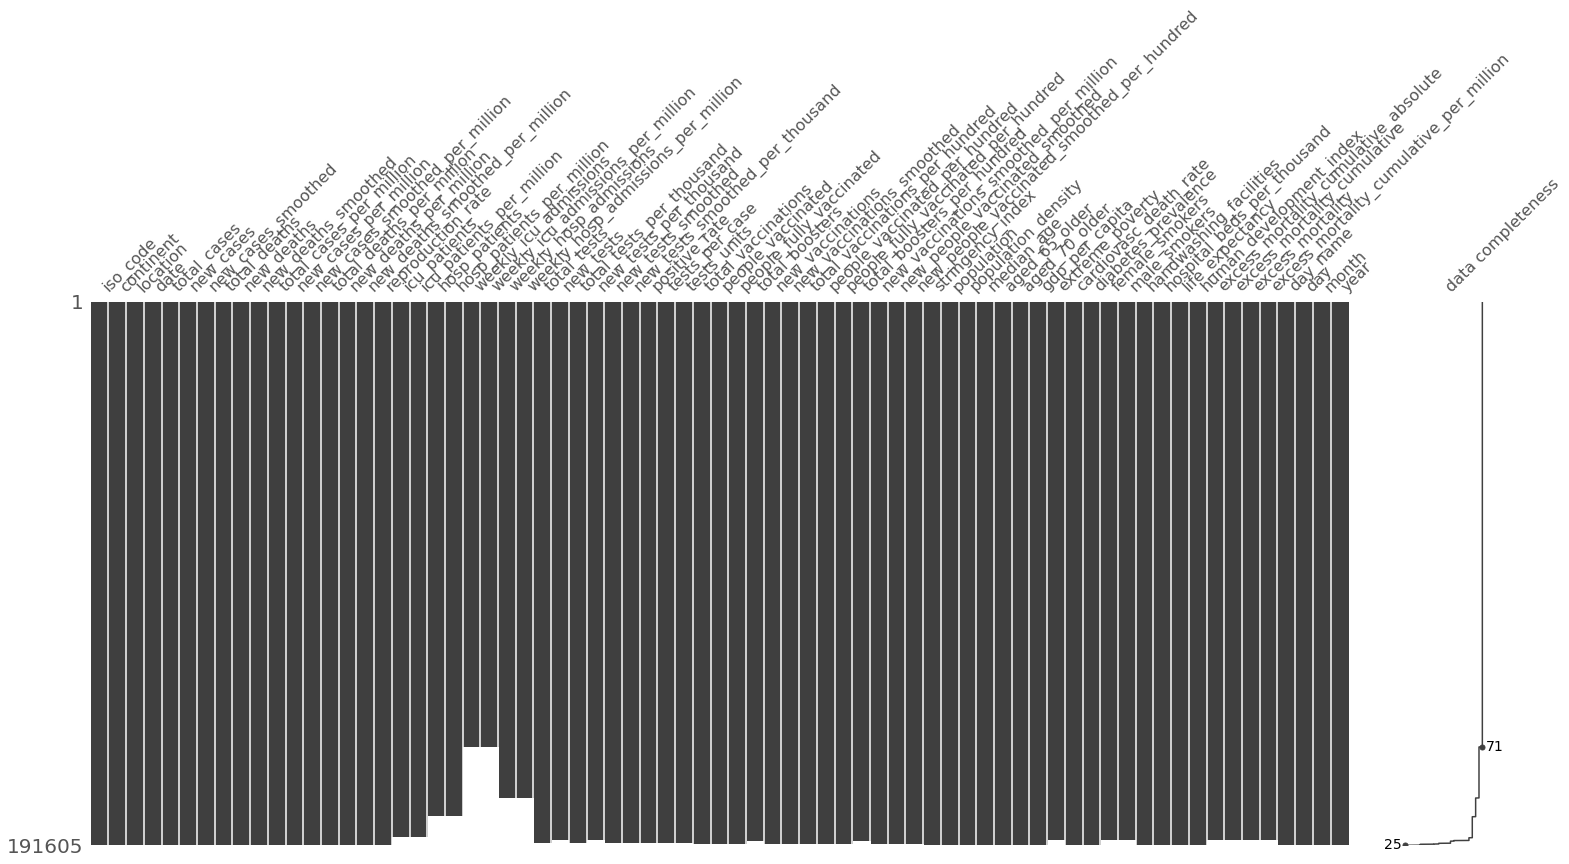

In [15]:
msno.matrix(df_filled, labels=True, sort='descending')

In [16]:
df_filled.drop(columns=['day', 'month', 'year']).describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.916050e+05,1.916050e+05,1.916000e+05,1.915770e+05,191577.000000,191572.000000,191605.000000,191605.000000,191600.000000,191577.000000,...,189930.000000,189930.000000,191605.000000,191605.000000,191605.000000,191605.000000,1.899260e+05,189926.000000,189926.000000,189926.000000
mean,3.868309e+06,1.221134e+04,1.277340e+04,7.007296e+04,138.629757,140.118396,46893.092953,192.476133,193.782154,684.339048,...,11.583541,31.643301,48.464744,3.047704,73.563553,0.723293,5.587238e+04,13.363806,15.786369,1726.801520
std,2.158845e+07,8.545743e+04,8.414270e+04,3.401739e+05,736.206074,718.836477,84269.980337,942.816166,620.386615,953.164967,...,11.354672,13.919152,32.311333,2.522183,7.386361,0.150157,1.766961e+05,13.690031,26.858404,2113.067025
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,3.111000e+03,0.000000e+00,7.286000e+00,1.060000e+02,0.000000,0.000000,890.749000,0.000000,1.549000,30.076000,...,1.900000,21.000000,19.351000,1.300000,68.370000,0.594000,1.567000e+02,3.330000,1.130000,248.019069
50%,3.918500e+04,7.500000e+01,1.037140e+02,1.079000e+03,1.000000,1.429000,7933.022000,10.471000,21.343000,202.931000,...,6.434000,30.200000,43.993000,2.400000,75.050000,0.740000,4.739000e+03,10.930000,8.110000,1134.110282
75%,4.228280e+05,1.094000e+03,1.198036e+03,9.309000e+03,15.000000,16.714000,59774.594000,101.561000,140.199000,1020.630000,...,20.100000,40.800000,79.807000,4.000000,78.950000,0.845000,3.848690e+04,22.800000,27.430000,2650.220728
max,5.317037e+08,4.079835e+06,3.437236e+06,6.298372e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6392.438000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


# Compute Pairwise Correlation

In [17]:
# compute the correlation matrix
cor_mat = df_filled.drop(columns=['day', 'month', 'year']).describe().corr()
cor_mat

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.998544,0.998158,0.999548,-0.056802,-0.074392,0.965676,0.683813,0.045613,-0.119838,...,-0.150216,-0.150124,-0.150081,-0.150340,-0.150272,-0.150397,0.984113,-0.149856,-0.148445,-0.104535
new_cases,0.998544,1.000000,0.999961,0.999217,-0.006308,-0.023942,0.975282,0.720156,0.096075,-0.069576,...,-0.100078,-0.099984,-0.099941,-0.100203,-0.100128,-0.100260,0.987491,-0.099716,-0.098299,-0.054302
new_cases_smoothed,0.998158,0.999961,1.000000,0.999096,0.001834,-0.015801,0.977058,0.725729,0.104167,-0.061448,...,-0.091979,-0.091885,-0.091842,-0.092104,-0.092030,-0.092161,0.988561,-0.091617,-0.090198,-0.046152
total_deaths,0.999548,0.999217,0.999096,1.000000,-0.029691,-0.047297,0.972550,0.702930,0.072631,-0.092822,...,-0.123327,-0.123236,-0.123192,-0.123452,-0.123387,-0.123510,0.988700,-0.122966,-0.121549,-0.077421
new_deaths,-0.056802,-0.006308,0.001834,-0.029691,1.000000,0.999844,0.184835,0.689117,0.994744,0.997984,...,0.995590,0.995598,0.995602,0.995578,0.995584,0.995572,0.078559,0.995624,0.995756,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,-0.150397,-0.100260,-0.092161,-0.123510,0.995572,0.997074,0.092108,0.617999,0.980725,0.999511,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.014865,1.000000,0.999998,0.998734
excess_mortality_cumulative_absolute,0.984113,0.987491,0.988561,0.988700,0.078559,0.061155,0.992059,0.768294,0.178956,0.016190,...,-0.014677,-0.014589,-0.014534,-0.014806,-0.014764,-0.014865,1.000000,-0.014306,-0.012864,0.032634
excess_mortality_cumulative,-0.149856,-0.099716,-0.091617,-0.122966,0.995624,0.997116,0.092665,0.618428,0.980832,0.999528,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.014306,1.000000,0.999999,0.998763
excess_mortality,-0.148445,-0.098299,-0.090198,-0.121549,0.995756,0.997223,0.094098,0.619545,0.981108,0.999572,...,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,-0.012864,0.999999,1.000000,0.998833


In [18]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.000000
new_tests_smoothed                            0.999771
new_people_vaccinated_smoothed                0.999716
new_vaccinations_smoothed                     0.999675
new_vaccinations                              0.999626
                                                ...   
new_people_vaccinated_smoothed_per_hundred   -0.123451
hospital_beds_per_thousand                   -0.123452
reproduction_rate                            -0.123485
positive_rate                                -0.123507
human_development_index                      -0.123510
Name: total_deaths, Length: 62, dtype: float64

<AxesSubplot:title={'center':'Unique values per column'}>

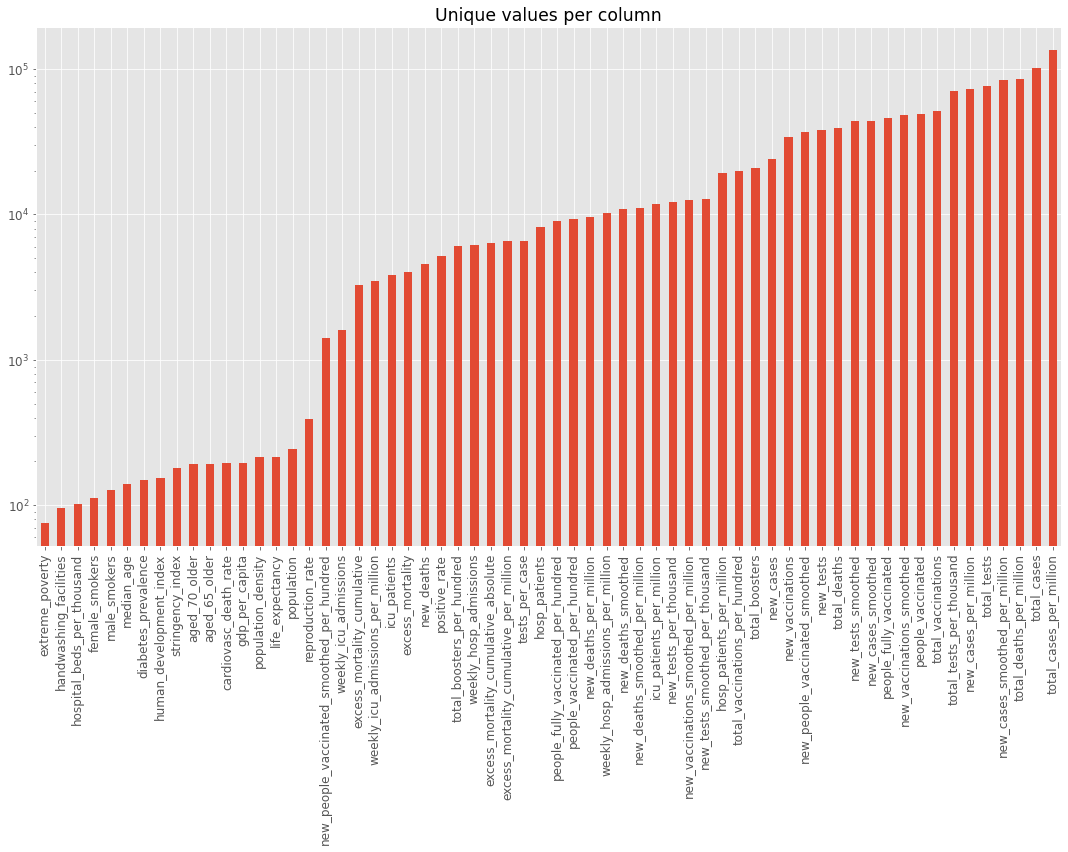

In [19]:
# get the unique values for each numerical column
unique_values = df_filled.drop(columns=['date', 'day', 'month', 'year']).select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 12), title='Unique values per column')

<AxesSubplot:title={'center':'Percentage of missing values per column'}, xlabel='Column Name', ylabel='Ration of missing values per column'>

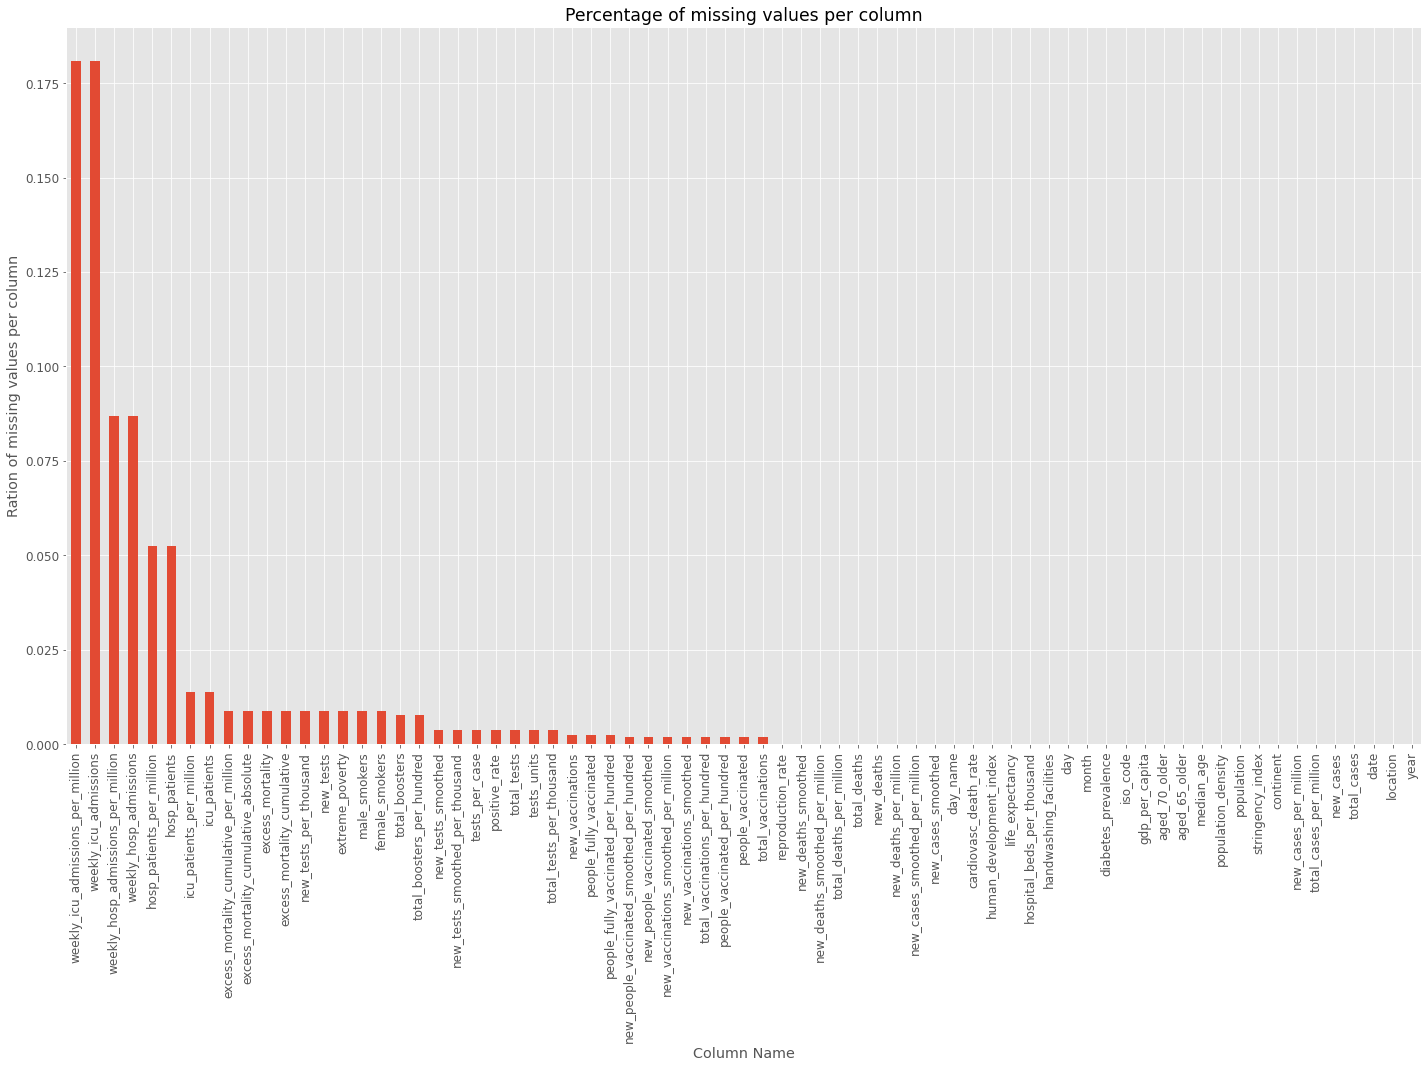

In [20]:
df_filled.isna().mean().sort_values(ascending=False).plot(
  kind='bar', figsize=(20, 15),
  title='Percentage of missing values per column',
  xlabel='Column Name', ylabel='Ration of missing values per column'
)

# Check Duplication

In [21]:
df_filled.duplicated().sum()

0

In [22]:
df_filled.describe(exclude='number')

,iso_code,continent,location,date,tests_units,day_name
count,191605,191605,191605,191605,190900,191605
unique,244,6,244,886,4,7
top,MEX,Africa,Mexico,2021-08-26 00:00:00,tests performed,Saturday
freq,886,47850,886,243,140143,27479
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-06-04 00:00:00,NaN,NaN


# Exploratory Data Analysis

Create helper functions to visualize datasets

In [23]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [24]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,0.126,0.126,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,0.126,0.000,NaN,2020,2,28,Friday


In [25]:
df_cases[['total_cases', 'new_cases', 'new_cases_smoothed',	'total_cases_per_million', 'new_cases_per_million',	'new_cases_smoothed_per_million']].describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
count,1.916050e+05,1.916050e+05,1.916000e+05,191605.000000,191605.000000,191600.000000
mean,3.868309e+06,1.221134e+04,1.277340e+04,46893.092953,192.476133,193.782154
std,2.158845e+07,8.545743e+04,8.414270e+04,84269.980337,942.816166,620.386615
min,1.000000e+00,0.000000e+00,0.000000e+00,0.001000,0.000000,0.000000
25%,3.111000e+03,0.000000e+00,7.286000e+00,890.749000,0.000000,1.549000
50%,3.918500e+04,7.500000e+01,1.037140e+02,7933.022000,10.471000,21.343000
75%,4.228280e+05,1.094000e+03,1.198036e+03,59774.594000,101.561000,140.199000
max,5.317037e+08,4.079835e+06,3.437236e+06,706541.904000,208049.887000,37617.428000


In [26]:
df_cases.isna().sum()                                   # check missing values

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_cases_per_million           0
new_cases_per_million             0
new_cases_smoothed_per_million    5
year                              0
month                             0
day                               0
day_name                          0
dtype: int64

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

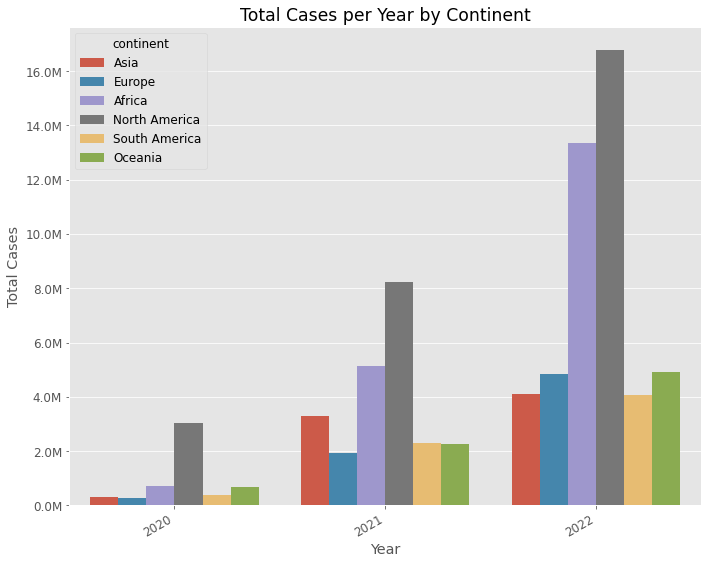

In [27]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', 
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

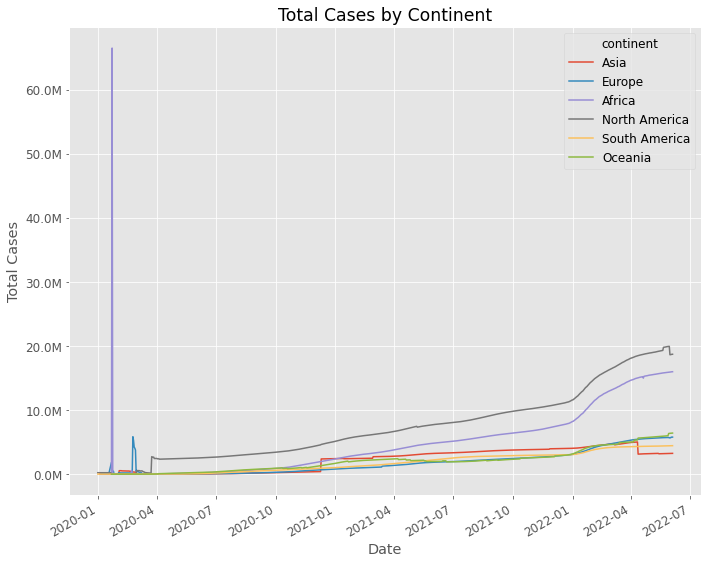

In [28]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

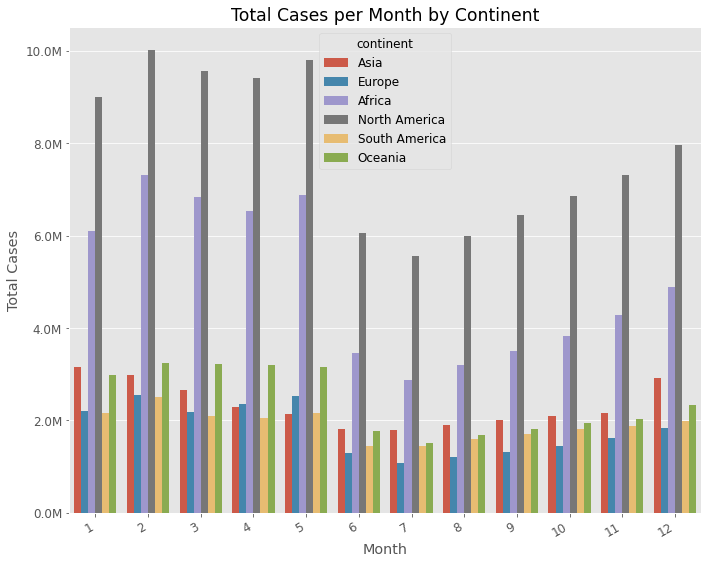

In [29]:
plot_bar(
    data=df_cases,
    x='month', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

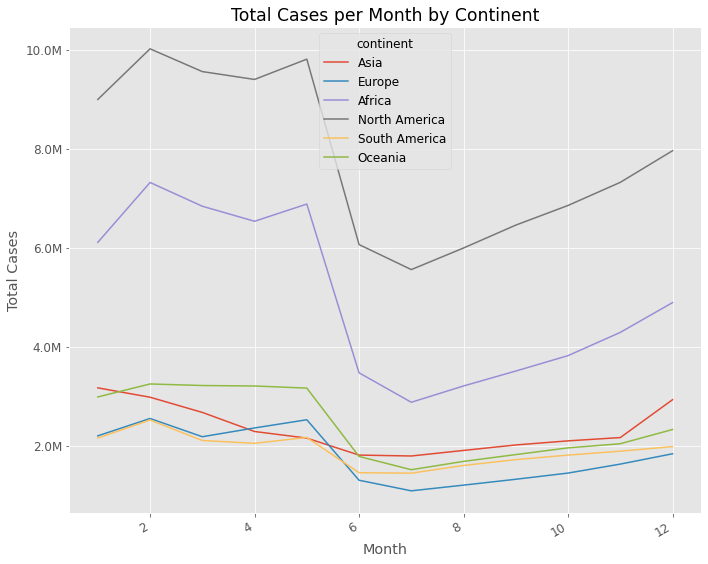

In [30]:
plot_line(
    data=df_cases,
    x='month', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

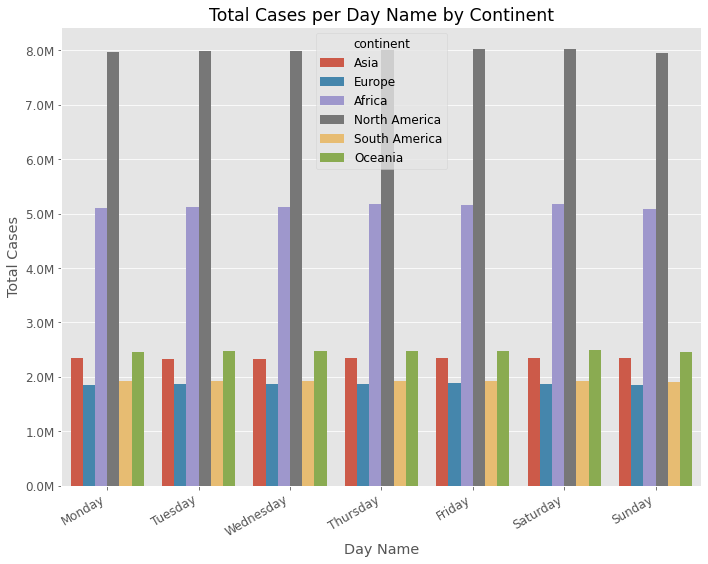

In [31]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', 
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

# Deaths Exploration

In [32]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month', 'day', 'day_name']

df_deaths = df[deaths_cols]
df_deaths.head()

,iso_code,continent,location,date,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday


In [33]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
count,1.655910e+05,165565.000000,164402.000000,164755.000000,164729.000000,163571.000000
mean,6.484638e+04,157.783185,158.744039,589.073138,1.586684,1.585928
std,3.378677e+05,789.970569,773.459403,874.391300,5.382683,3.545945
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.400000e+01,0.000000,0.143000,23.437000,0.000000,0.010000
50%,9.190000e+02,1.000000,2.000000,165.456000,0.088000,0.262000
75%,8.472000e+03,17.000000,19.143000,849.954000,1.212000,1.633000
max,6.298372e+06,18151.000000,14795.286000,6392.438000,550.399000,144.167000


In [34]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          11139
location                               0
date                                   0
total_deaths                       26014
new_deaths                         26040
new_deaths_smoothed                27203
total_deaths_per_million           26850
new_deaths_per_million             26876
new_deaths_smoothed_per_million    28034
year                                   0
month                                  0
day                                    0
day_name                               0
dtype: int64

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

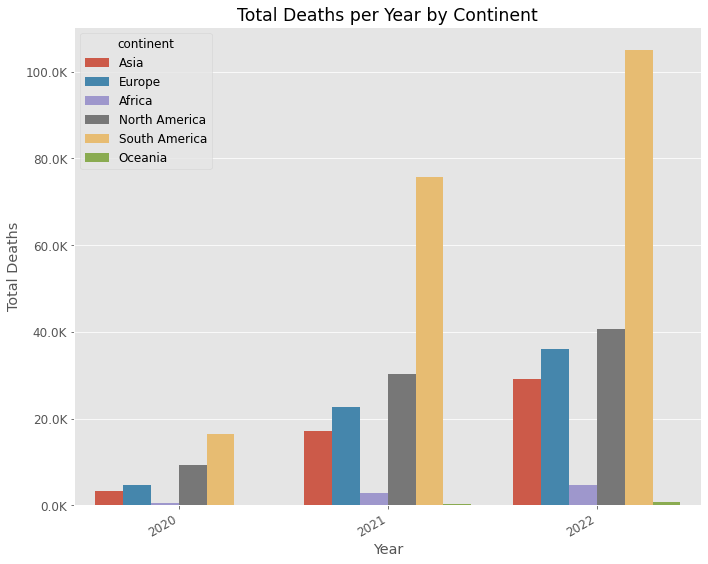

In [35]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

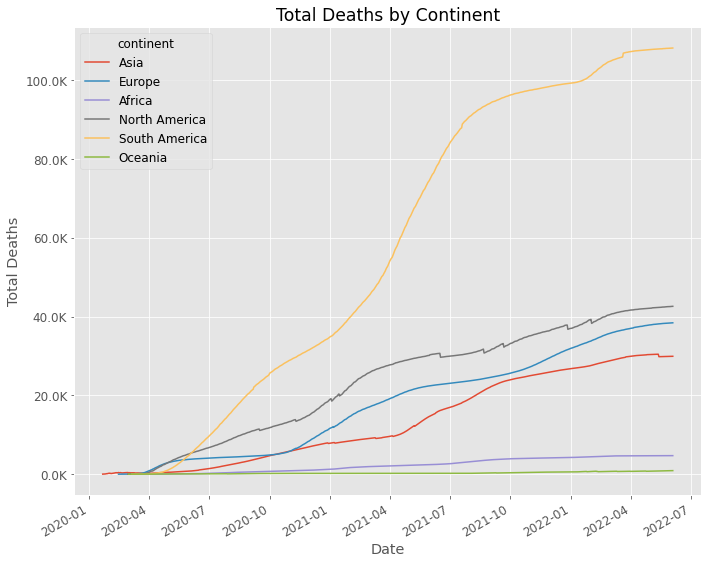

In [36]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

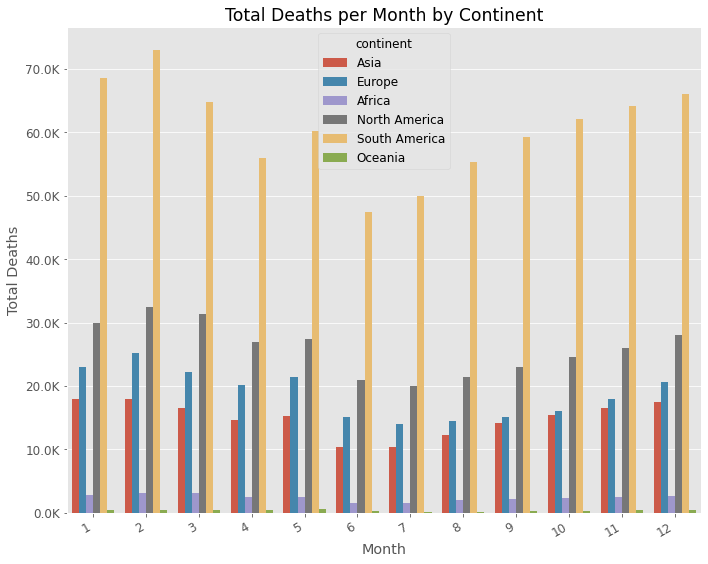

In [37]:
plot_bar(
    data=df_deaths,
    x='month', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

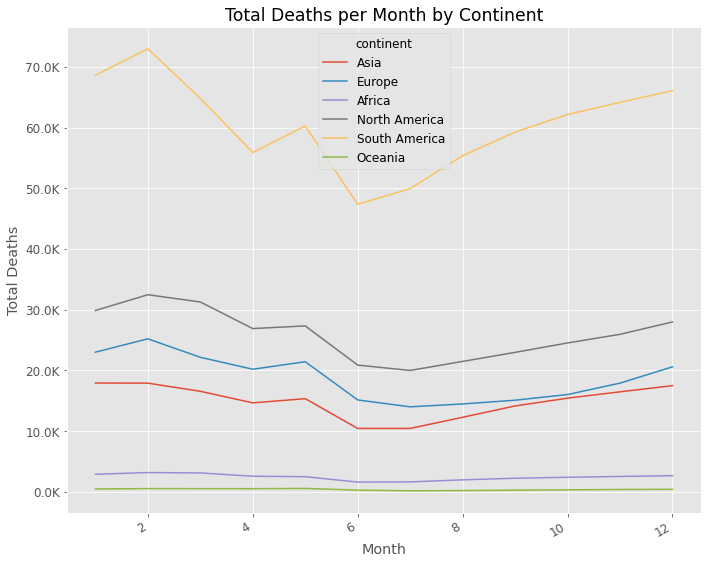

In [38]:
plot_line(
    data=df_deaths,
    x='month', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

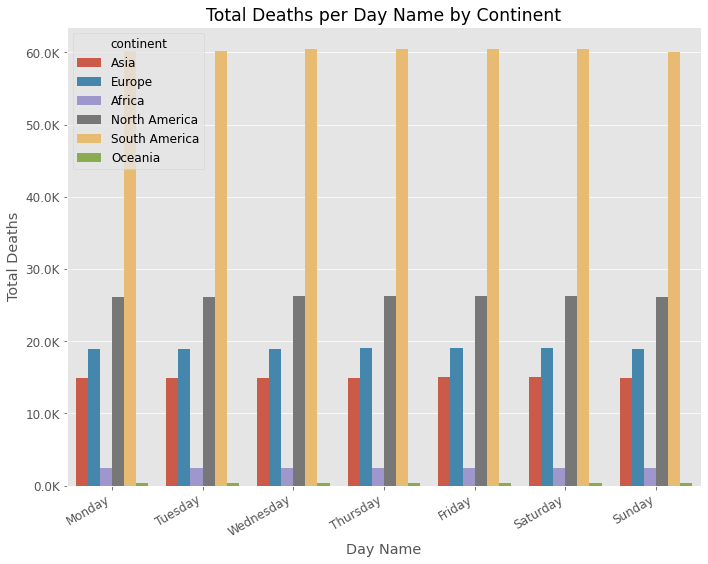

In [39]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

# Tests Exploration

In [40]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month', 'day', 
             'day_name']

df_test = df[test_cols]
df_test

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191600,ZWE,Africa,Zimbabwe,2022-05-31,NaN,NaN,NaN,NaN,2672.0,0.177,0.0785,12.7,tests performed,2022,5,31,Tuesday
191601,ZWE,Africa,Zimbabwe,2022-06-01,NaN,NaN,NaN,NaN,2688.0,0.178,0.0875,11.4,tests performed,2022,6,1,Wednesday
191602,ZWE,Africa,Zimbabwe,2022-06-02,NaN,2336493.0,154.815,NaN,2703.0,0.179,0.0743,13.5,tests performed,2022,6,2,Thursday
191603,ZWE,Africa,Zimbabwe,2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,6,3,Friday


In [41]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case
count,7.400800e+04,7.768300e+04,77683.000000,74008.000000,1.013150e+05,101315.000000,93441.000000,9.168100e+04
mean,6.716863e+04,2.040440e+07,890.641053,3.252738,1.448286e+05,2.827552,0.098719,2.457499e+03
std,2.494456e+05,8.237443e+07,2128.481550,8.984824,1.152784e+06,7.329485,0.118064,3.392404e+04
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,2.224000e+03,3.511625e+05,42.116500,0.283000,1.516000e+03,0.204500,0.017200,7.100000e+00
50%,8.677500e+03,1.986299e+06,225.722000,0.961000,6.702000e+03,0.861000,0.055300,1.740000e+01
75%,3.637300e+04,9.740478e+06,865.567000,2.921000,3.203200e+04,2.601000,0.138200,5.320000e+01
max,3.585563e+07,9.214000e+09,32925.900000,534.013000,1.476998e+07,147.603000,1.000000,1.023632e+06


In [42]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           11139
location                                0
date                                    0
new_tests                          117597
total_tests                        113922
total_tests_per_thousand           113922
new_tests_per_thousand             117597
new_tests_smoothed                  90290
new_tests_smoothed_per_thousand     90290
positive_rate                       98164
tests_per_case                      99924
tests_units                         87526
year                                    0
month                                   0
day                                     0
day_name                                0
dtype: int64

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

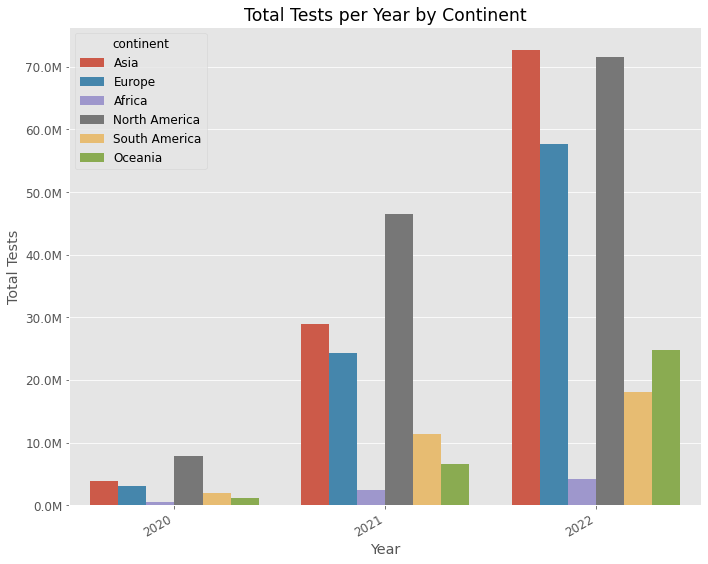

In [43]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

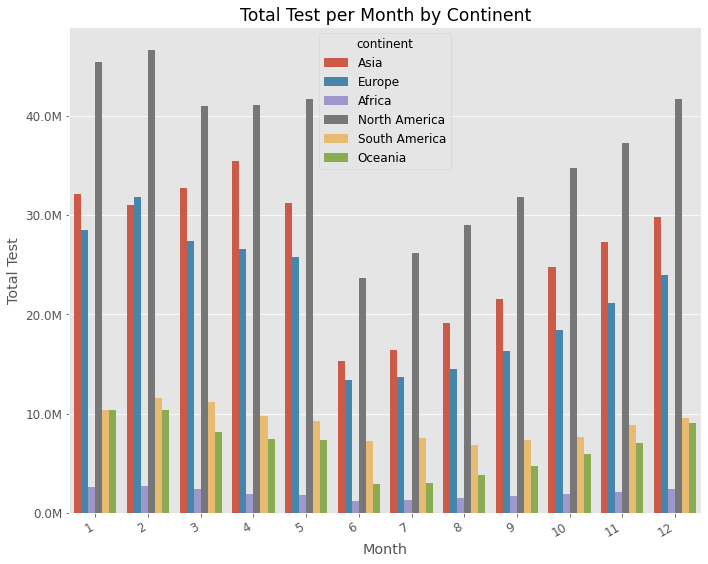

In [44]:
plot_bar(
    data=df_test,
    x='month', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

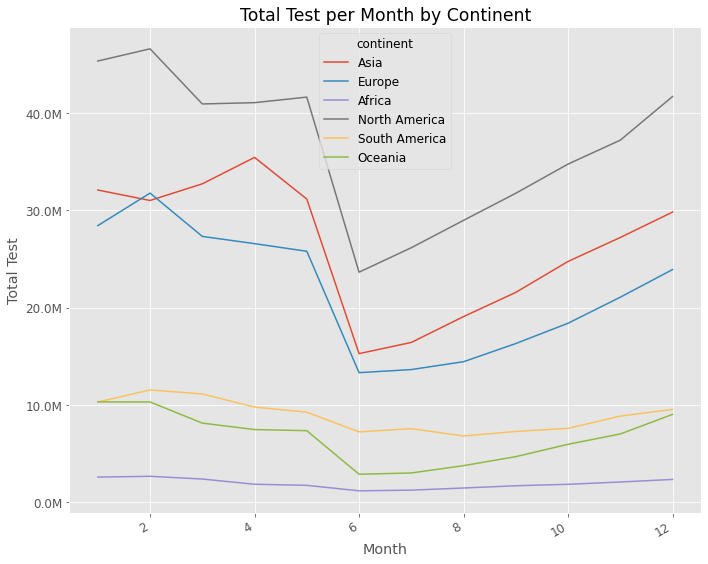

In [45]:
plot_line(
    data=df_test,
    x='month', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

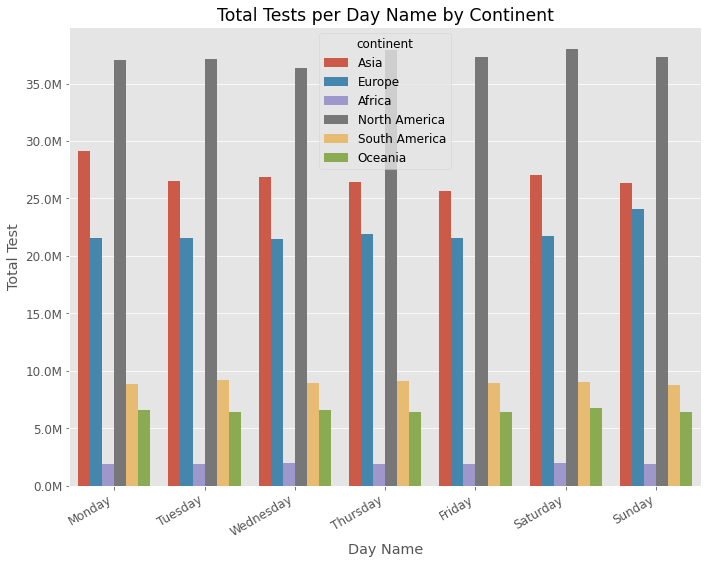

In [46]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

# Vaccinations Exploration

In [47]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month', 'day', 'day_name']

df_vacc = df[vacc_cols]
df_vacc

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,28,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191600,ZWE,Africa,Zimbabwe,2022-05-31,11771952.0,6249146.0,4522237.0,1000569.0,8101.0,9837.0,...,41.41,29.96,6.63,652.0,2332.0,0.015,2022,5,31,Tuesday
191601,ZWE,Africa,Zimbabwe,2022-06-01,11775542.0,6250326.0,4524043.0,1001173.0,3590.0,9215.0,...,41.41,29.98,6.63,611.0,2148.0,0.014,2022,6,1,Wednesday
191602,ZWE,Africa,Zimbabwe,2022-06-02,11780528.0,6251633.0,4525568.0,1003327.0,4986.0,8321.0,...,41.42,29.99,6.65,551.0,1887.0,0.013,2022,6,2,Thursday
191603,ZWE,Africa,Zimbabwe,2022-06-03,11794546.0,6253396.0,4529357.0,1011793.0,14018.0,8295.0,...,41.43,30.01,6.70,550.0,1770.0,0.012,2022,6,3,Friday


In [48]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
count,5.244100e+04,4.996000e+04,4.742800e+04,2.450100e+04,4.296200e+04,1.036400e+05,52441.000000,49960.000000,47428.000000,24501.000000,103640.000000,1.025500e+05,102550.000000
mean,2.261961e+08,1.100483e+08,9.153023e+07,3.789235e+07,1.076730e+06,4.643881e+05,86.141883,42.446953,37.247324,18.396076,2953.869973,1.810313e+05,0.127355
std,9.721228e+08,4.714041e+08,4.072407e+08,1.661939e+08,3.999525e+06,2.586829e+06,71.775511,29.818212,28.887099,21.321906,3784.902031,1.066020e+06,0.229011
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8.045470e+05,4.781700e+05,3.837988e+05,2.644800e+04,5.480250e+03,8.330000e+02,17.450000,11.950000,7.620000,0.150000,488.750000,2.830000e+02,0.015000
50%,6.700237e+06,3.970455e+06,3.269266e+06,1.049754e+06,3.954300e+04,7.722500e+03,75.290000,44.860000,35.735000,8.090000,1723.500000,2.989000e+03,0.055000
75%,4.302983e+07,2.293280e+07,1.965602e+07,8.942269e+06,2.774450e+05,5.764825e+04,142.300000,69.350000,63.710000,33.630000,4154.250000,2.151225e+04,0.157000
max,1.186035e+10,5.190317e+09,4.739418e+09,1.995606e+09,4.967011e+07,4.368666e+07,355.750000,124.880000,122.940000,116.260000,117497.000000,2.106743e+07,11.750000


In [49]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                           0
continent                                      11139
location                                           0
date                                               0
total_vaccinations                            139164
people_vaccinated                             141645
people_fully_vaccinated                       144177
total_boosters                                167104
new_vaccinations                              148643
new_vaccinations_smoothed                      87965
total_vaccinations_per_hundred                139164
people_vaccinated_per_hundred                 141645
people_fully_vaccinated_per_hundred           144177
total_boosters_per_hundred                    167104
new_vaccinations_smoothed_per_million          87965
new_people_vaccinated_smoothed                 89055
new_people_vaccinated_smoothed_per_hundred     89055
year                                               0
month                                         

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

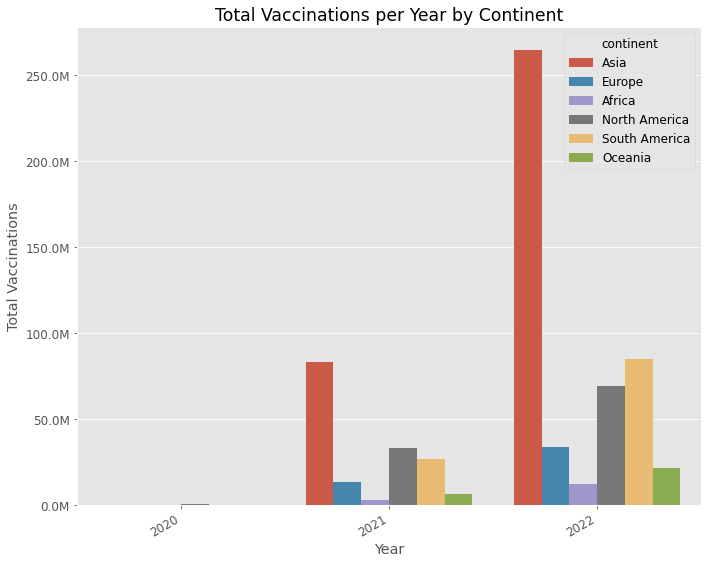

In [50]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

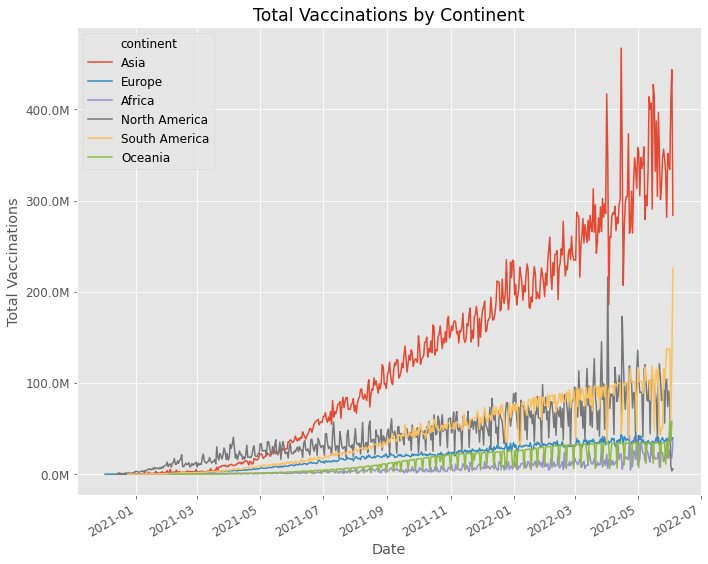

In [51]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

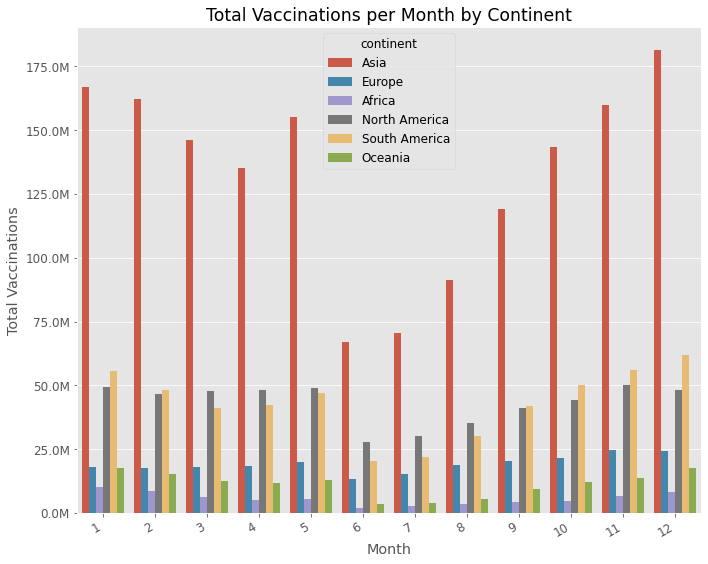

In [52]:
plot_bar(
    data=df_vacc,
    x='month', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

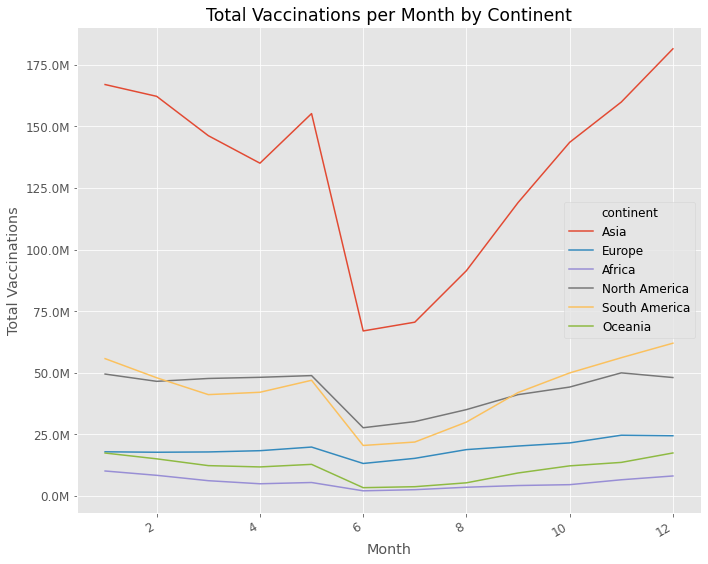

In [53]:
plot_line(
    data=df_vacc,
    x='month', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

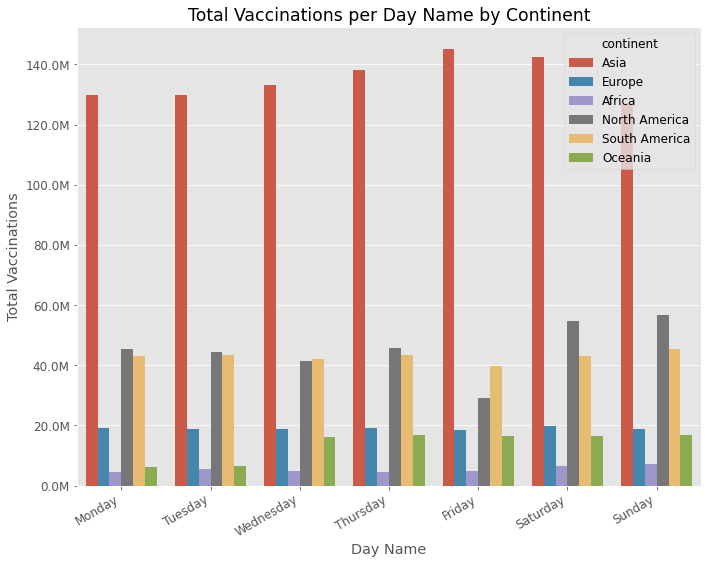

In [54]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

# Demographics Exploration

In [55]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month', 'day', 'day_name']

df_demo = df[demo_cols]
df_demo.head()

,iso_code,continent,location,date,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,day_name
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,24,Monday
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,25,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,26,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,27,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,54.422,18.6,2.581,1.337,1803.987,...,64.83,0.511,NaN,NaN,NaN,NaN,2020,2,28,Friday


In [56]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.904390e+05,170729.000000,158243.000000,156566.000000,157413.000000,157396.000000,102750.000000,157882.000000,165601.000000,119414.000000,117777.000000,77572.000000,140085.000000,179180.000000,153810.000000,6.553000e+03,6553.000000,6553.000000,6553.000000
mean,1.431944e+08,458.235805,30.654334,8.833127,5.572006,19635.449420,13.602277,260.691141,8.366022,10.643700,32.792187,50.923062,3.068636,73.649320,0.725212,4.093095e+04,9.773072,15.594497,1117.569401
std,6.951970e+08,2112.745574,9.070075,6.139566,4.170305,20576.478104,20.024824,119.949926,4.687321,10.580507,13.529958,31.856414,2.520051,7.449572,0.149730,1.138387e+05,16.007568,28.965876,1563.316733
min,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,8.960050e+05,37.312000,22.300000,3.526000,2.063000,4449.898000,0.600000,168.711000,5.310000,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.100000e+01,-0.120000,-0.280000,-6.412607
50%,7.552800e+06,88.125000,30.600000,6.704000,4.209000,12951.839000,2.200000,243.811000,7.200000,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.269400e+03,6.570000,7.460000,574.011450
75%,3.277620e+07,214.243000,39.100000,14.312000,8.678000,27936.896000,21.200000,329.942000,10.590000,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.786380e+04,14.700000,21.800000,1794.278748
max,7.874966e+09,20546.766000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [57]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   11139
location                                        0
date                                            0
population                                   1166
population_density                          20876
median_age                                  33362
aged_65_older                               35039
aged_70_older                               34192
gdp_per_capita                              34209
extreme_poverty                             88855
cardiovasc_death_rate                       33723
diabetes_prevalence                         26004
female_smokers                              72191
male_smokers                                73828
handwashing_facilities                     114033
hospital_beds_per_thousand                  51520
life_expectancy                             12425
human_development_index                     37795
excess_mortality_cumulative_absolute       185052


<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

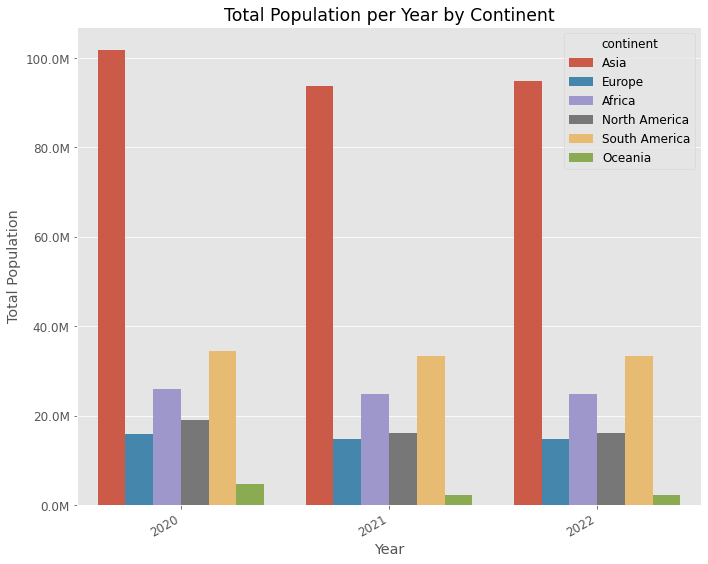

In [58]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

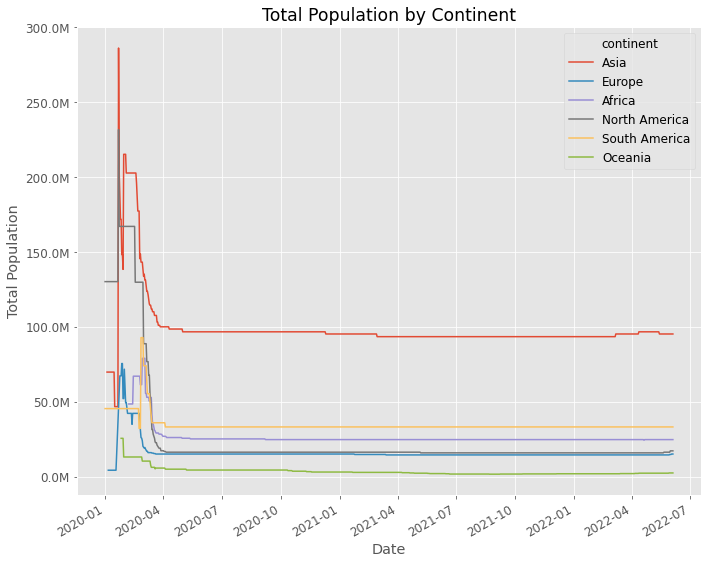

In [59]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

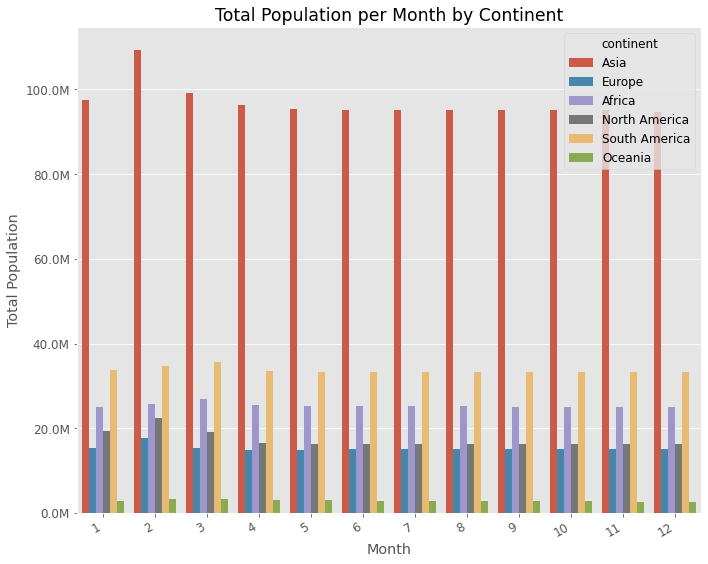

In [60]:
plot_bar(
    data=df_demo,
    x='month', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, markers=None, style=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None)>

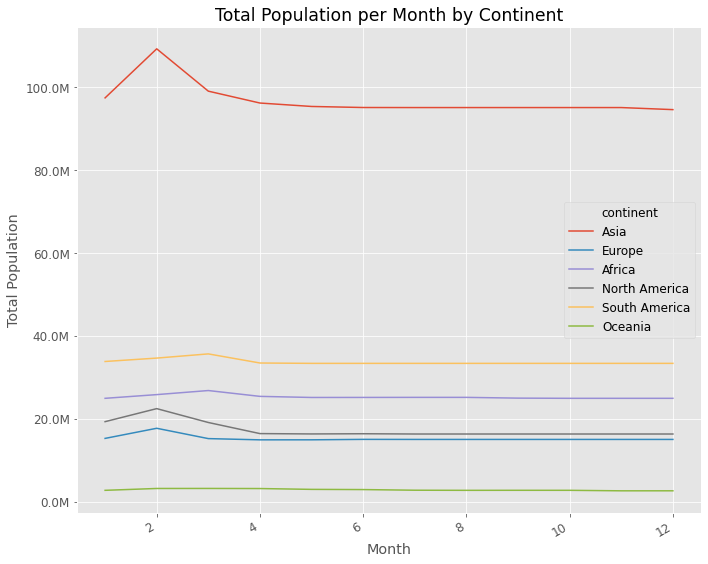

In [61]:
plot_line(
    data=df_demo,
    x='month', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

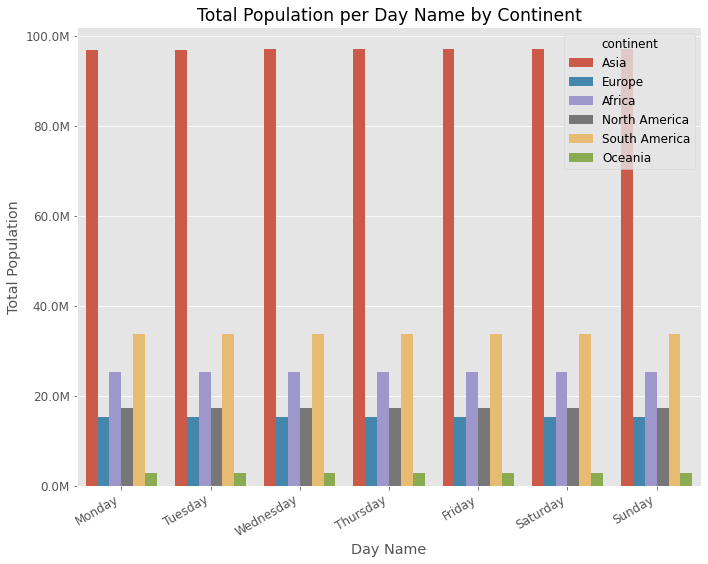

In [62]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

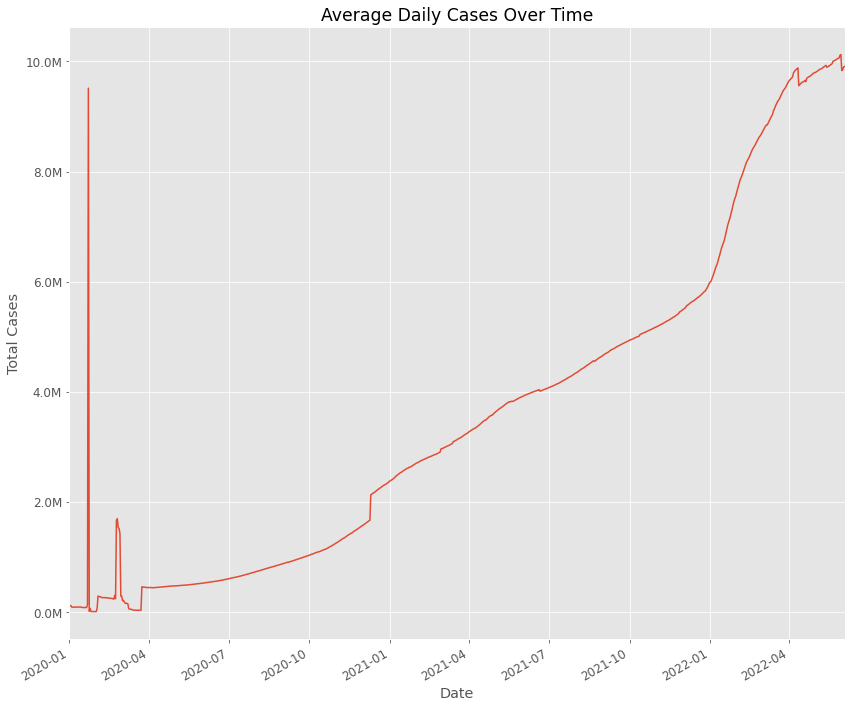

In [63]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

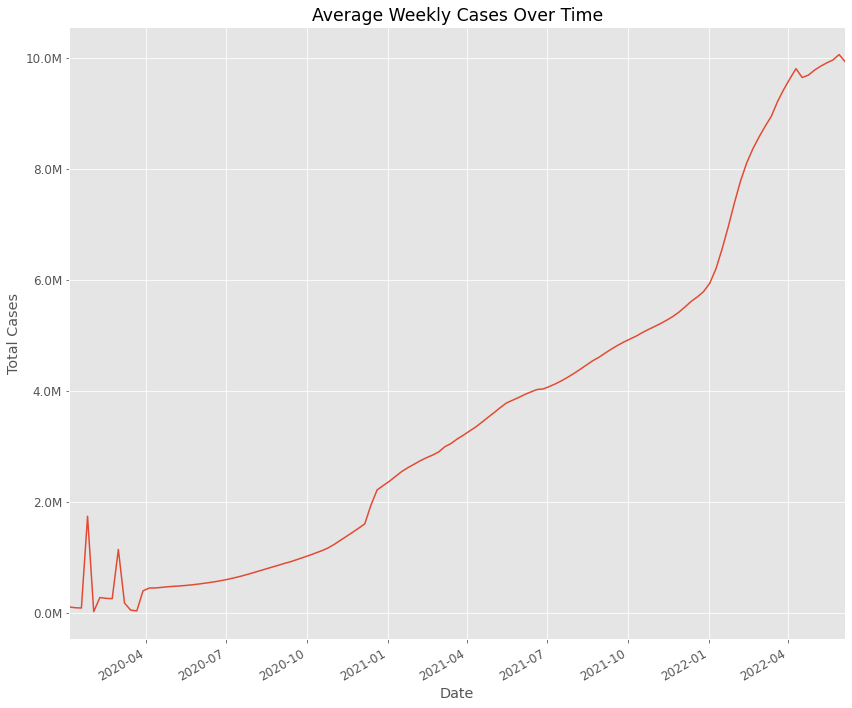

In [64]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

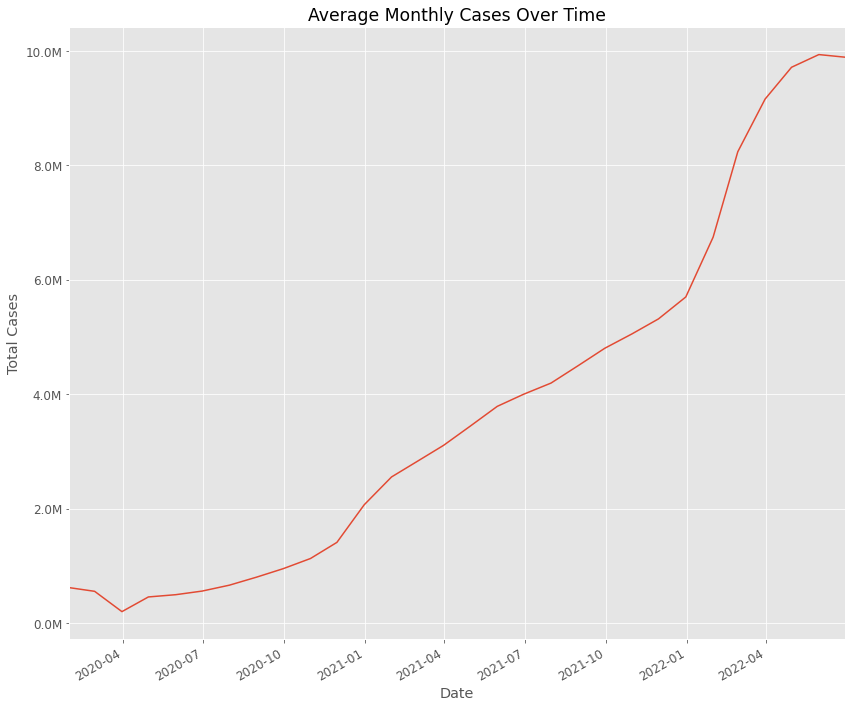

In [65]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

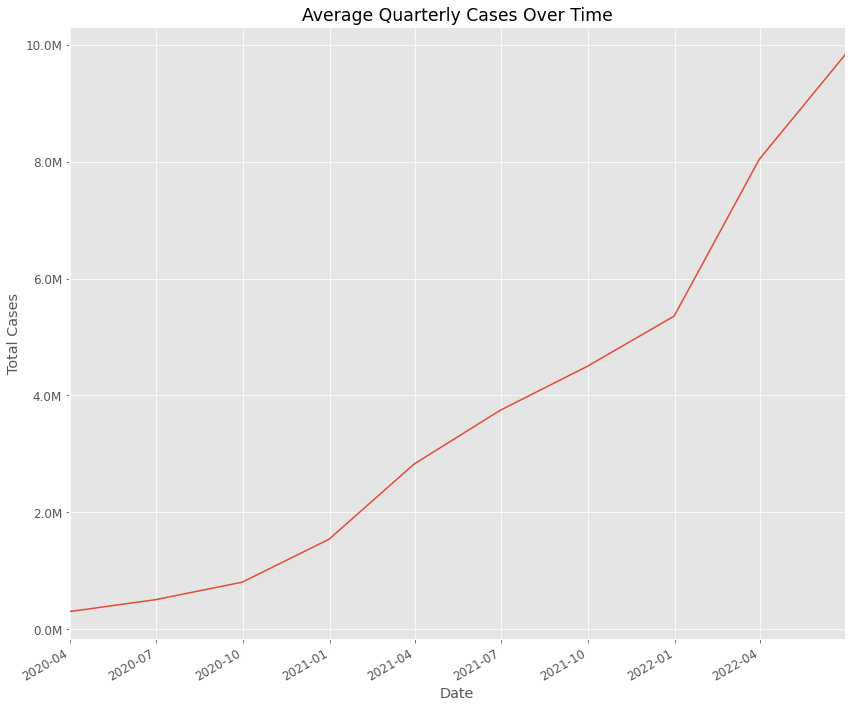

In [66]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

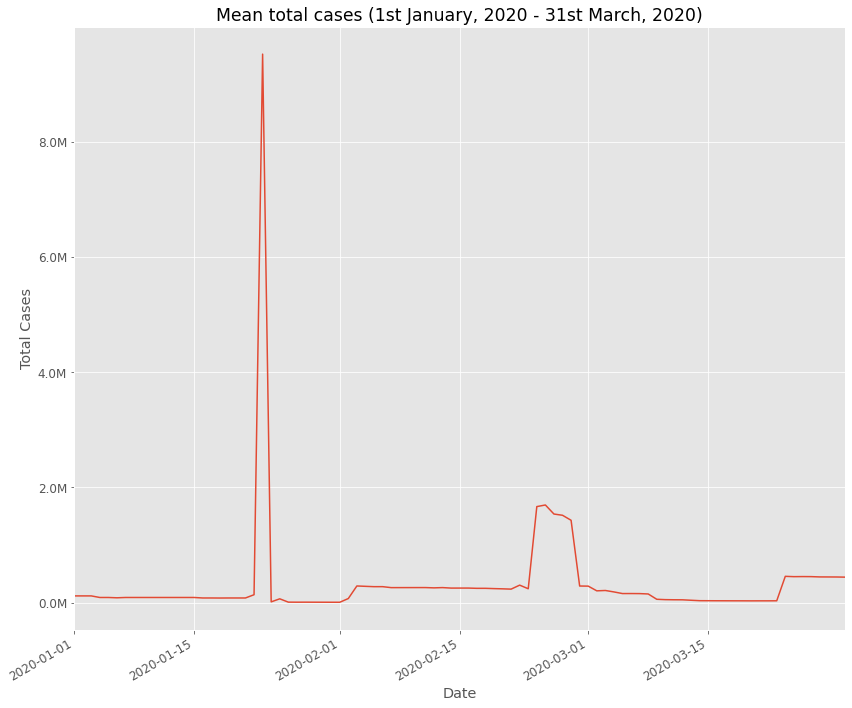

In [67]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

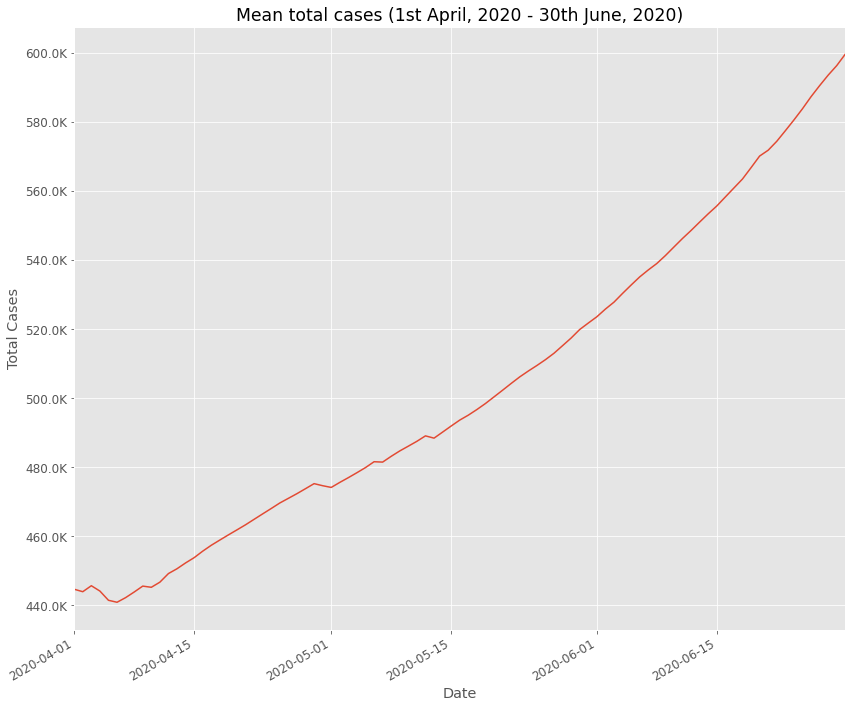

In [68]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

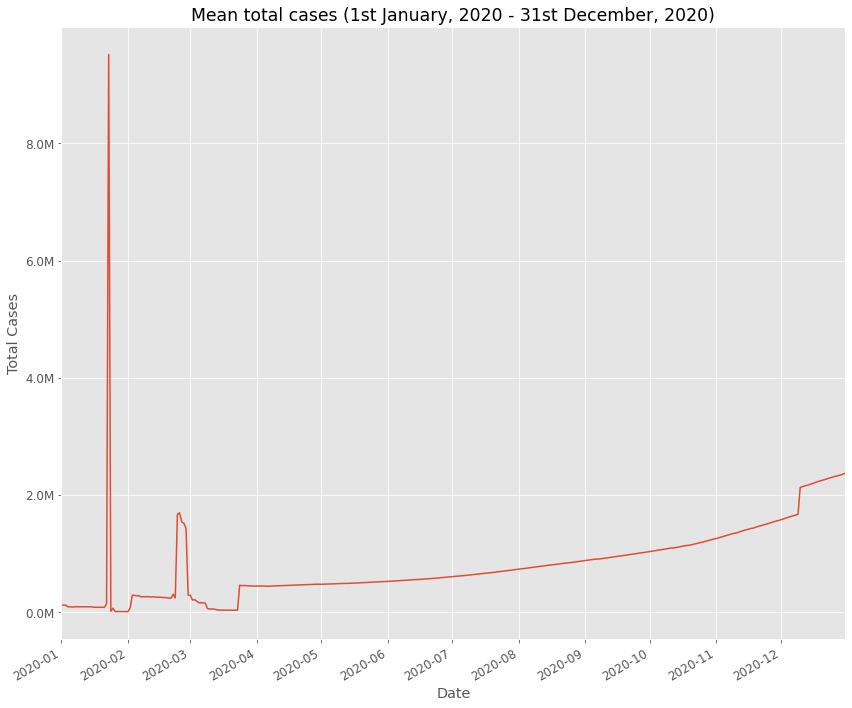

In [69]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

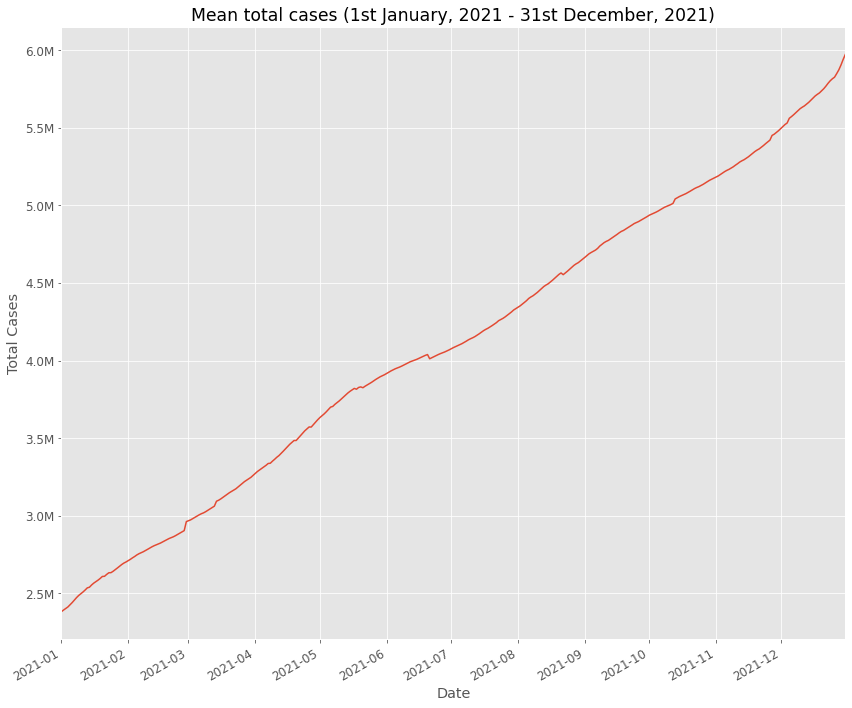

In [70]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

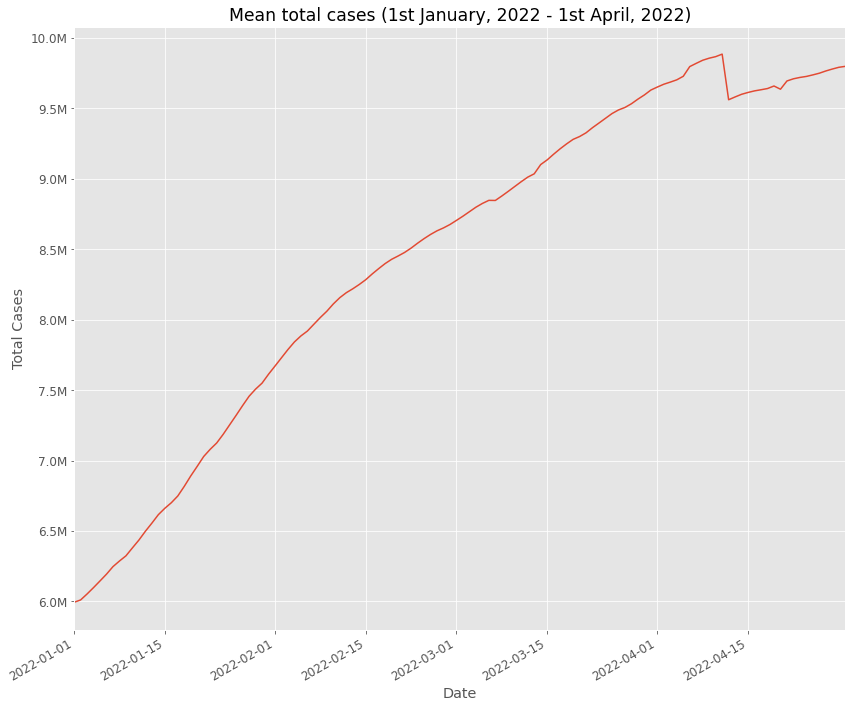

In [71]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)